In [1]:
import yfinance as yf
import pandas as pd
from typing import cast
import mplfinance as mpf

In [2]:
data = cast(pd.DataFrame, yf.download("BTC-USD", start="2024-01-01", interval="1d"))
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2024-01-01,44167.332031,44175.437500,42214.976562,42280.234375,18426978443
2024-01-02,44957.968750,45899.707031,44176.949219,44187.140625,39335274536
2024-01-03,42848.175781,45503.242188,40813.535156,44961.601562,46342323118
2024-01-04,44179.921875,44770.023438,42675.175781,42855.816406,30448091210
2024-01-05,44162.691406,44353.285156,42784.718750,44192.980469,32336029347
...,...,...,...,...,...
2025-01-27,102087.687500,103214.109375,97795.937500,102680.304688,89006608428
2025-01-28,101332.476562,103730.820312,100238.187500,102095.414062,47180685494


In [3]:
data.columns = data.columns.get_level_values(0)
data

Price,Close,High,Low,Open,Volume
Date,,,,,
2024-01-01,44167.332031,44175.437500,42214.976562,42280.234375,18426978443
2024-01-02,44957.968750,45899.707031,44176.949219,44187.140625,39335274536
2024-01-03,42848.175781,45503.242188,40813.535156,44961.601562,46342323118
2024-01-04,44179.921875,44770.023438,42675.175781,42855.816406,30448091210
2024-01-05,44162.691406,44353.285156,42784.718750,44192.980469,32336029347
...,...,...,...,...,...
2025-01-27,102087.687500,103214.109375,97795.937500,102680.304688,89006608428
2025-01-28,101332.476562,103730.820312,100238.187500,102095.414062,47180685494
2025-01-29,103703.210938,104750.804688,101283.820312,101317.523438,47432049818


In [4]:
df = data.copy()

In [5]:
df["ema50"] = df.ta.ema(length=50)
df.head()

AttributeError: 'DataFrame' object has no attribute 'ta'

In [199]:
df[["bb_low", "bb_mid", "bb_up"]] = df.ta.bbands(length=20).iloc[:, :-2]
df.head()

Price,Close,High,Low,Open,Volume,ema50,bb_low,bb_mid,bb_up
Date,,,,,,,,,
2024-01-01,44167.332031,44175.437500,42214.976562,42280.234375,18426978443,NaN,NaN,NaN,NaN
2024-01-02,44957.968750,45899.707031,44176.949219,44187.140625,39335274536,NaN,NaN,NaN,NaN
2024-01-03,42848.175781,45503.242188,40813.535156,44961.601562,46342323118,NaN,NaN,NaN,NaN
2024-01-04,44179.921875,44770.023438,42675.175781,42855.816406,30448091210,NaN,NaN,NaN,NaN
2024-01-05,44162.691406,44353.285156,42784.718750,44192.980469,32336029347,NaN,NaN,NaN,NaN


In [200]:
df.loc[df["bb_low"] > df["ema50"], "signal"] = "buy"
df.loc[df["bb_up"] < df["ema50"], "signal"] = "sell"

In [201]:
len(df[df["signal"] == "buy"])

48

In [202]:
len(df[df["signal"] == "sell"])

0

In [203]:
df.loc[df["signal"] == "buy", "marker_position"] = df.Low * 0.95
df.loc[df["signal"] == "sell", "marker_position"] = df.High * 1.05

In [204]:
plot_marker = ["^" if x == "buy" else "v" for x in df["signal"]]
color_marker = ["green" if x == "buy" else "red" for x in df["signal"]]
signal_plot = mpf.make_addplot(
    data=df["marker_position"], type="scatter", color=color_marker, marker=plot_marker
)

indi = [
    mpf.make_addplot(df["bb_low"], type="line", color="black"),
    mpf.make_addplot(df["bb_up"], type="line", color="black"),
    mpf.make_addplot(df["ema50"], type="line", color="green"),
]

all_plot = indi + [signal_plot]

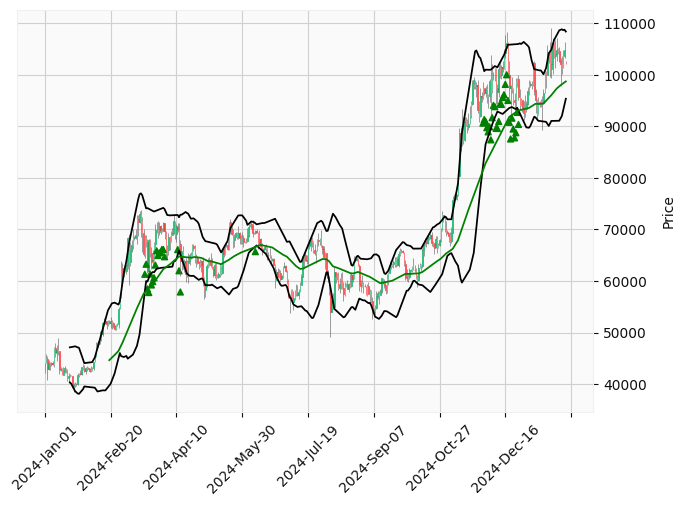

In [205]:
mpf.plot(data=df, type="candle", style="yahoo", addplot=all_plot)